In [1]:
from dr_manhattan.exchanges import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
config = {
    "private_key": os.getenv("POLYMARKET_PRIVATE_KEY"),
    "funder": os.getenv("POLYMARKET_FUNDER"),
}

exchange = Polymarket(config)
print(f"Polymarket time-series ready ({'authenticated' if exchange.private_key else 'public'})")

Polymarket time-series ready (authenticated)


In [3]:
crypto_tag = exchange.get_tag_by_slug('crypto')
crypto_hourly = exchange.get_tag_by_slug('1H')
crypto_15min = exchange.get_tag_by_slug('15M')
crypto_daily = exchange.get_tag_by_slug('today')
crypto_hit = exchange.get_tag_by_slug('hit-price')
election = exchange.get_tag_by_slug('election')

crypto_hourly

Tag(id='102175', label='1H', slug='1H', force_show=True, force_hide=None, is_carousel=False, published_at=None, created_at='2025-05-27T15:23:31.696219Z', updated_at='2025-06-09T19:29:13.140216Z', raw={'id': '102175', 'label': '1H', 'slug': '1H', 'forceShow': True, 'createdAt': '2025-05-27T15:23:31.696219Z', 'updatedAt': '2025-06-09T19:29:13.140216Z', 'isCarousel': False})

In [ ]:
#https://docs.polymarket.com/developers/gamma-markets-api/get-markets

crypto_hourly_markets = exchange.search_markets(
    limit=500,
    tag_id=crypto_daily.id,
    closed=True,
    keywords = ['bitcoin', 'up or down'],
    binary=True,
    min_liquidity=0.0,
)

crypto_hourly_markets[:5]

[Market(id='689406', question='Bitcoin Up or Down on November 20?', outcomes=['Up', 'Down'], close_time=datetime.datetime(2025, 11, 20, 17, 0, tzinfo=datetime.timezone.utc), volume=623967.616207, liquidity=0.0, prices={'Down': 1.0}, metadata={'id': '689406', 'question': 'Bitcoin Up or Down on November 20?', 'conditionId': '0xc0290ad534039805717cd142270d60379045c3e777063a41f7626a72429056d1', 'slug': 'bitcoin-up-or-down-on-november-20', 'resolutionSource': 'https://www.binance.com/en/trade/BTC_USDT', 'endDate': '2025-11-20T17:00:00Z', 'startDate': '2025-11-18T17:04:45.37508Z', 'image': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png', 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png', 'description': 'This market will resolve to "Up" if the "Close" price for the Binance 1 minute candle for BTC/USDT Nov 19 \'25 12:00 in the ET timezone (noon) is lower than the final "Close" price for the Nov 20 \'25 12:00 ET candle.\n\nThis market will r

In [5]:
epl_tag = exchange.get_tag_by_slug('EPL')

tottenham_markets = exchange.search_markets(
        limit=500,
        tag_id=epl_tag.id,
        closed=True,
        keywords=['will tottenham win on'],
        binary=True,
    )

tottenham_markets[:5]

[Market(id='650101', question='Will Tottenham win on 2025-11-08?', outcomes=['Yes', 'No'], close_time=datetime.datetime(2025, 11, 8, 12, 30, tzinfo=datetime.timezone.utc), volume=614787.624804, liquidity=0.0, prices={'No': 1.0}, metadata={'id': '650101', 'question': 'Will Tottenham win on 2025-11-08?', 'conditionId': '0x4164cca7c5da1cfc6d9684651f308188ddbbbd8fe1e54402f20c9df732386cd9', 'slug': 'epl-tot-mun-2025-11-08-tot', 'resolutionSource': 'https://www.premierleague.com/', 'endDate': '2025-11-08T12:30:00Z', 'startDate': '2025-10-26T04:14:48.949392Z', 'image': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/Repetitive-markets/premier+league.jpg', 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/Repetitive-markets/premier+league.jpg', 'description': 'In the upcoming game, scheduled for November 8, 2025\nIf Tottenham wins, this market will resolve to "Yes".\nOtherwise, this market will resolve to "No".\nIf the game is postponed, this market will remain open until the

In [6]:
target_market = crypto_hourly_markets[0]
target_market = tottenham_markets[0]

df = exchange.fetch_price_history(target_market, interval="max", fidelity=1, as_dataframe=True)
df

,timestamp,price
0,2025-10-26 04:30:27+00:00,0.4950
1,2025-10-26 04:40:23+00:00,0.4950
2,2025-10-26 04:50:23+00:00,0.4950
3,2025-10-26 05:00:27+00:00,0.4950
4,2025-10-26 05:10:24+00:00,0.4950
...,...,...
1926,2025-11-08 16:50:09+00:00,0.0005
1927,2025-11-08 17:00:32+00:00,0.0005
1928,2025-11-08 17:10:22+00:00,0.0005
1929,2025-11-08 17:20:09+00:00,0.0005


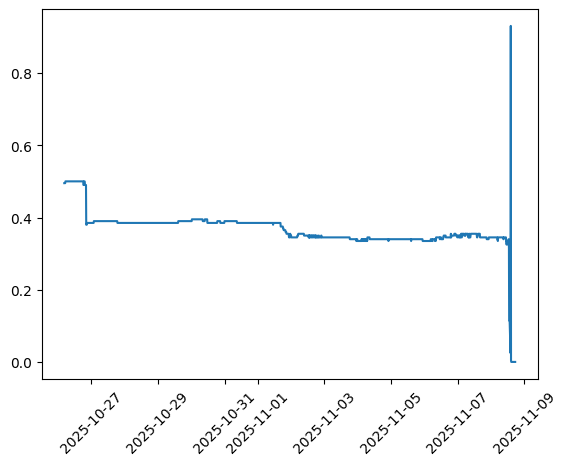

In [7]:
plt.plot(df['timestamp'], df['price'])
plt.xticks(rotation=45)
plt.show()

In [8]:
tmp_trades = exchange.fetch_public_trades(market=target_market, limit=1000)
tmp_trades[:5]

[PublicTrade(proxy_wallet='0xeccffd3b5dd231888693c42b6d16a6b1756fbb01', side='SELL', asset='34588492297362754962199393312569099682311961522359709460476273371070201172555', condition_id='0x4164cca7c5da1cfc6d9684651f308188ddbbbd8fe1e54402f20c9df732386cd9', size=2.98, price=0.999, timestamp=datetime.datetime(2025, 11, 8, 17, 24, 47, tzinfo=datetime.timezone.utc), title='Will Tottenham win on 2025-11-08?', slug='epl-tot-mun-2025-11-08-tot', icon='https://polymarket-upload.s3.us-east-2.amazonaws.com/Repetitive-markets/premier+league.jpg', event_slug='epl-tot-mun-2025-11-08', outcome='No', outcome_index=1, name='Ronin12', pseudonym='Turbulent-Nickel', bio='', profile_image='', profile_image_optimized='', transaction_hash='0x7b1f8a9500aa11624f1f2eedc826909fa5e9fa7f69af39988671de2b57fdb9d9'),
 PublicTrade(proxy_wallet='0x9bba68b5ba1c3badfbc0416ae556d6abf522b20f', side='SELL', asset='34588492297362754962199393312569099682311961522359709460476273371070201172555', condition_id='0x4164cca7c5da1cfc

In [9]:
trades = pd.DataFrame(tmp_trades)
up_trades = trades[trades['outcome']=='Yes'].set_index('timestamp').sort_index()
up_trades[['side', 'price']]

,side,price
timestamp,,
2025-11-08 12:07:39+00:00,BUY,0.34
2025-11-08 12:07:41+00:00,BUY,0.34
2025-11-08 12:08:11+00:00,BUY,0.34
2025-11-08 12:08:31+00:00,BUY,0.34
2025-11-08 12:09:05+00:00,BUY,0.34
...,...,...
2025-11-08 14:25:01+00:00,BUY,0.02
2025-11-08 14:25:31+00:00,SELL,0.04
2025-11-08 14:26:15+00:00,BUY,0.01


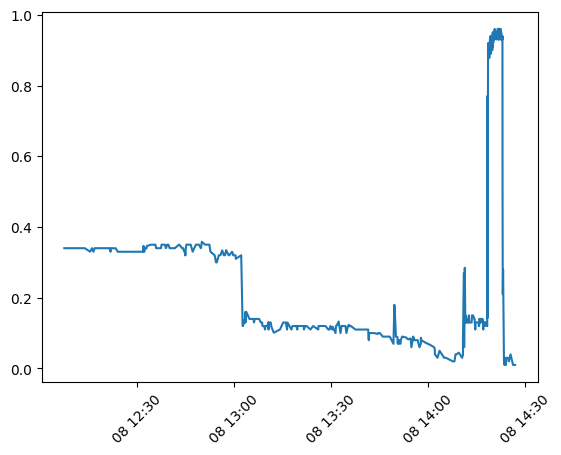

In [10]:
plt.plot(up_trades['price'])
plt.xticks(rotation=45)
plt.show()

In [11]:
aespakarina = '0xca85f4b9e472b542e1df039594eeaebb6d466bf2'
#tmp_market='0xbb877d541d16896757c57107abe0632450ce1bedb4a46d4eae8ba1d1978207a6'
#user_trades = exchange.fetch_public_trades(market=tmp_market, user=aespakarina, limit=1000)
aespakarina_trades = exchange.fetch_public_trades(user=aespakarina, limit=100)
aespakarina_trades[:5]

[PublicTrade(proxy_wallet='0xca85f4b9e472b542e1df039594eeaebb6d466bf2', side='SELL', asset='106651843519470994985930974408601442891724292582511005763049746003139804181872', condition_id='0xbb877d541d16896757c57107abe0632450ce1bedb4a46d4eae8ba1d1978207a6', size=50.0, price=0.97, timestamp=datetime.datetime(2025, 11, 16, 13, 42, 47, tzinfo=datetime.timezone.utc), title='Bitcoin Up or Down - November 16, 8:30AM-8:45AM ET', slug='btc-updown-15m-1763299800', icon='https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png', event_slug='btc-updown-15m-1763299800', outcome='Down', outcome_index=1, name='aespakarina', pseudonym='Idle-Exaggeration', bio='one look give em whiplash', profile_image='https://polymarket-upload.s3.us-east-2.amazonaws.com/profile-image-903202-8b12b8b3-d90d-4357-98bc-2816f761a91e.jpg', profile_image_optimized='', transaction_hash='0x574628efe0285611c5d71703beec3341e8660bdd6be0a23580afd938e8e9dcf0'),
 PublicTrade(proxy_wallet='0xca85f4b9e472b542e1df039594eeae